<a href="https://colab.research.google.com/github/JuWanMaeng/papaer-review/blob/main/SqueezeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input,Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,AvgPool2D,Activation
from keras.models import Sequential,Model
from keras.layers import Concatenate
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [12]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

In [16]:
CLASS_NACLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
print(x_train.shape,x_train[0].shape)

(45000, 32, 32, 3) (32, 32, 3)


In [127]:
def fire_module(x,filters):
  # squeeze module
  squeeze1=Conv2D(filters[0],(1,1),strides=1,padding='same',activation='relu')(x)

  # expand module
  expand1_1=Conv2D(filters[1],(1,1),strides=1,padding='same',activation='relu')(squeeze1)
  expand1_3=Conv2D(filters[2],(3,3),strides=1,padding='same',activation='relu')(squeeze1)

  con1=Concatenate(axis=-1)([expand1_1,expand1_3])
  
  squeeze2=Conv2D(filters[0],(1,1),strides=1,padding='same',activation='relu')(con1)

  expand2_1=Conv2D(filters[1],(1,1),strides=1,padding='same',activation='relu')(squeeze2)
  expand2_3=Conv2D(filters[2],(3,3),strides=1,padding='same',activation='relu')(squeeze2)

  con2=Concatenate(axis=-1)([expand2_1,expand2_3])

  return Concatenate(axis=-1)([con1,con2])
  

In [158]:
def SqueezeNet():
  # SqueezeNet with simple bypa
  input_im=Input(shape=(32,32,3)) 

  x=Conv2D(96,(3,3),strides=2,padding='same',activation='relu')(input_im)
  x=MaxPool2D((3,3),strides=2,padding='same')(x)

  x=fire_module(x,[16,64,64])
  
  x=MaxPool2D((3,3),strides=1,padding='same')(x)

  x=fire_module(x,[32,128,128])
  x=MaxPool2D((3,3),strides=2,padding='same')(x)
  
  
 
  x=fire_module(x,[48,192,192])
  
  x=MaxPool2D((3,3),strides=2,padding='same')(x)

  x=fire_module(x,[64,256,256])
  
  x=MaxPool2D((3,3),strides=2,padding='same')(x)

  x=Flatten()(x)
  x=Dense(256,activation='relu')(x)
  x=Dropout(0.5)(x)
  x=Dense(10,activation='softmax')(x)

  model=Model(inputs=input_im,outputs=x)

  return model
    

In [159]:
model=SqueezeNet()

In [160]:
model.summary()

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_621 (Conv2D)             (None, 16, 16, 96)   2688        input_37[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_94 (MaxPooling2D) (None, 8, 8, 96)     0           conv2d_621[0][0]                 
__________________________________________________________________________________________________
conv2d_622 (Conv2D)             (None, 8, 8, 16)     1552        max_pooling2d_94[0][0]           
___________________________________________________________________________________________

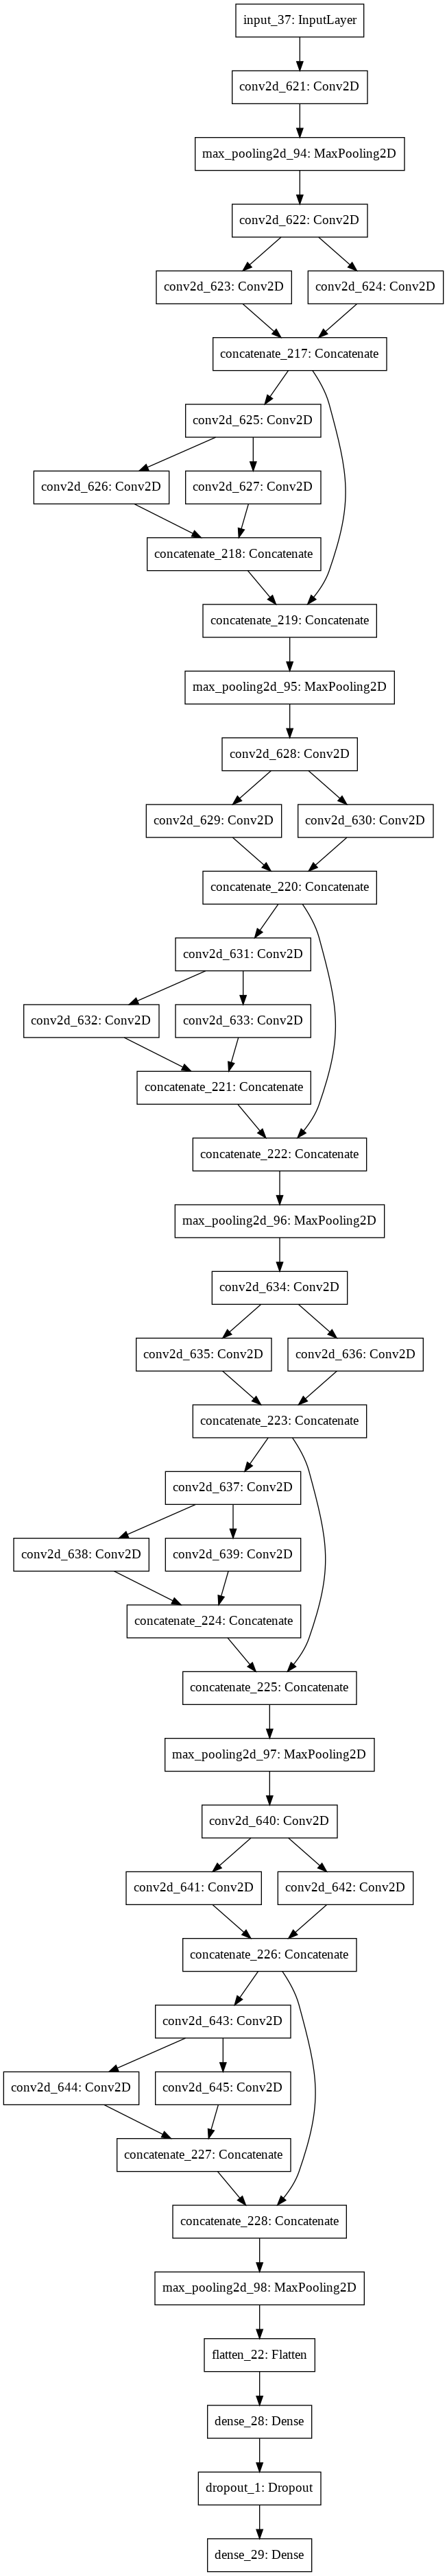

In [161]:
tf.keras.utils.plot_model(model,to_file='model.png')

In [162]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=keras.callbacks.EarlyStopping(patience=20)
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[es])

Epoch 1/50
1407/1407 [==============================] - 23s 13ms/step - loss: 2.3033 - accuracy: 0.1023 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 2/50
 818/1407 [================>.............] - ETA: 6s - loss: 2.3027 - accuracy: 0.0980

KeyboardInterrupt: ignored

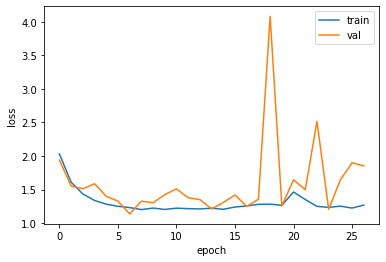

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
def SqueezeNet():

  input_im=Input(shape=(32,32,3)) 

  x=Conv2D(96,(3,3),strides=2,padding='same',activation='relu')(input_im)
  x=MaxPool2D((3,3),strides=2,padding='same')(x)

  x=fire_module(x,[16,64,64])
  x=fire_module(x,[16,64,64])
  x=MaxPool2D((3,3),strides=2,padding='same')(x)
  
  x=fire_module(x,[32,128,128])
  x=fire_module(x,[32,128,128])
  x=MaxPool2D((3,3),strides=2,padding='same')(x)

  x=fire_module(x,[48,192,192])
  x=fire_module(x,[48,192,192])
  x=fire_module(x,[64,256,256])
  x=fire_module(x,[64,256,256])
  

  x=Conv2D(10,(1,1),strides=1,padding='same',activation='relu')(x)
  x=AvgPool2D((2,2),strides=1)(x)
  x=Activation('softmax')(x)

  model=Model(inputs=input_im,outputs=x)

  return model
    